# About Dataset

## Dataset Description :

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

Store - the store number

Date - the week of sales

Weekly_Sales - sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale in Ferenhit

Fuel_Price - Cost of fuel in the region in dollars per liter

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

### Holiday Events
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

# Analysis Tasks

## Statistics tasks

1) Which store has maximum sales

2) Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

3) Which store/s has good quarterly growth rate in Q3’2012

4) Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

5) Provide a monthly and semester view of sales in units and give insights



In [57]:
import pandas as pd 
import numpy as np
db = pd.read_csv('Walmart_Store_sales.csv')
db.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106


In [58]:
db.shape

(6435, 8)

In [59]:
db.isnull()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6430,False,False,False,False,False,False,False,False
6431,False,False,False,False,False,False,False,False
6432,False,False,False,False,False,False,False,False
6433,False,False,False,False,False,False,False,False


In [60]:
#checking data for null values
db.isnull().sum()


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [61]:
db.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [62]:
#we change the data type of date from objects to pandas date time format
db["Date"]= pd.to_datetime(db["Date"])
print (db)
print (db.dtypes)

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-05-02    1643690.90             0        42.31       2.572   
1         1 2010-12-02    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-05-03    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-05-10     733455.07             0        64.89       3.985   
6432     45 2012-12-10     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358  

C:\Users\IJ\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\IJ\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\IJ\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\IJ\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specify infer_date

In [63]:
#Checking for and removing duplicates from the data
db.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6430    False
6431    False
6432    False
6433    False
6434    False
Length: 6435, dtype: bool

In [64]:
db.duplicated().sum()

0

In [65]:
#doing some EDA here 
db.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


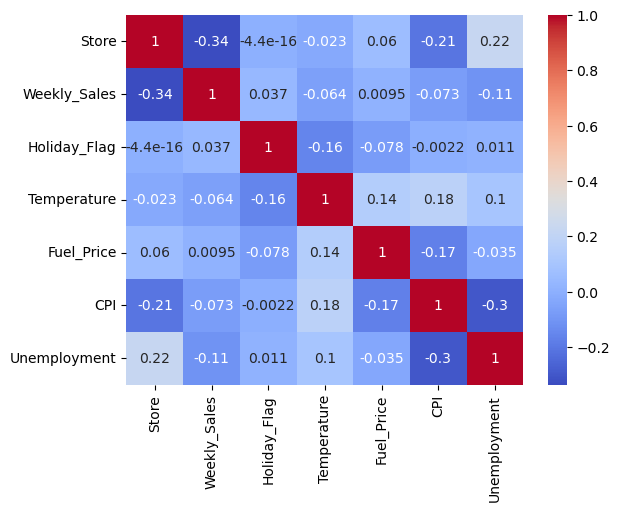

In [66]:
#Also checking for relationships in the data above, using a heat map to check the correlations in the variables above.
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

db.corr
sns.heatmap(db.corr(), cmap='coolwarm', annot=True)
plt.show()

## Insight:
looking at the heatmap we can see that there are both negative and positive correlations which are not so strong.They are very far apart from 1 or -1 
And this shows that the relationship in variables are very weak, lets look at all variables against the weekly sales.
(a) The store number shows a weak correlation, and really has nothing to to with the sales, and it shows the closeset negative correlation wth the weekly sale 
(b) Holiday_Flag shows a positive correlation, but its still far from being a reasonable factor to affect sales
(c) Temperature shows a negative correlation which is ideal, because the higher the tempearture it might affect the weekly sales neagtively, but this correlation is not strong enough to affect the weekly sales, its just on the negative side. 
(d) Fuel Price shows a very weak positive relation
(e) CPI and Unemployment shows a negative weak correlation with the weekly sales, which is reasonable as prices increses it might discourage customers from making sales. 

Conclusion: There should be other variables to look out for within the Mall that affects the weekly sales reasonable


###### Question; Which store has maximum sales?

In [68]:
db.max()

Store                            45
Date            2012-12-10 00:00:00
Weekly_Sales             3818686.45
Holiday_Flag                      1
Temperature                  100.14
Fuel_Price                    4.468
CPI                      227.232807
Unemployment                 14.313
dtype: object

In [69]:
sum_of_storedata = (db.groupby(['Store']).sum())

In [70]:
sum_of_storedata.sort_values('Weekly_Sales')

#The Store with the maximum sum is store 33 having a sum of $37,160,220

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,
33,3.716022e+07,10,10972.13,511.357,18401.192733,1220.241
44,4.329309e+07,10,7678.69,469.919,18401.192733,963.194
5,4.547569e+07,10,9925.65,460.417,30968.878137,900.243
36,5.341221e+07,10,10175.93,458.201,30706.256907,1125.274
38,5.515963e+07,10,10047.58,515.718,18401.192733,1875.657
3,5.758674e+07,10,10215.09,460.417,31372.988971,1026.309
30,6.271689e+07,10,9845.21,460.417,30837.422420,1090.210
37,7.420274e+07,10,10175.93,460.417,30706.256907,1125.274
16,7.425243e+07,10,6439.30,463.543,27693.986741,926.353


###### Question Which store has maximum standard deviation i.e., the sales vary a lot. 

In [71]:
std_of_storedata = db.groupby(['Store']).std()
print(std_of_storedata)
std_of_storedata.sort_values('Weekly_Sales')
#we can see below here that Store 37 has the maximum standard deviation

        Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price       CPI  \
Store                                                                   
1      155980.767761      0.255926    14.250486    0.427313  4.350890   
2      237683.694682      0.255926    15.492766    0.427313  4.342286   
3       46319.631557      0.255926    12.645851    0.427313  4.434232   
4      266201.442297      0.255926    16.180023    0.416967  1.858300   
5       37737.965745      0.255926    14.225352    0.427313  4.364848   
6      212525.855862      0.255926    14.146798    0.427313  4.389093   
7      112585.469220      0.255926    16.565002    0.430022  3.203795   
8      106280.829881      0.255926    16.024850    0.427313  4.435398   
9       69028.666585      0.255926    15.614281    0.427313  4.440007   
10     302262.062504      0.255926    14.031578    0.446957  1.858300   
11     165833.887863      0.255926    12.604436    0.427313  4.434232   
12     139166.871880      0.255926    16.630317    

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,
37,21837.461190,0.255926,12.094075,0.427313,4.315290,0.702688
30,22809.665590,0.255926,15.669462,0.427313,4.342286,0.615414
33,24132.927322,0.255926,15.377213,0.446957,1.858300,0.963780
44,24762.832015,0.255926,17.591004,0.392727,1.858300,0.958148
5,37737.965745,0.255926,14.225352,0.427313,4.364848,0.387415
43,40598.413260,0.255926,14.724562,0.427313,4.119136,0.479994
38,42768.169450,0.255926,16.630317,0.447926,1.858300,1.208114
3,46319.631557,0.255926,12.645851,0.427313,4.434232,0.447245
42,50262.925530,0.255926,14.031578,0.446957,1.858300,0.843684


###### Questions: Which store/s has good quarterly growth rate in Q3’2012

In [78]:
db

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [84]:
db['Quarter'] = pd.PeriodIndex(db.Date, freq='Q')
db



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010Q2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010Q4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010Q1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010Q1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010Q2
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012Q3
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012Q2
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012Q4
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012Q4


In [86]:
db.sort_values(by=["Store", "Date"])

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter
34,1,2010-01-10,1453329.50,0,71.89,2.603,211.671989,7.838,2010Q1
8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,2010Q1
21,1,2010-02-07,1492418.14,0,80.91,2.669,211.223533,7.787,2010Q1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010Q1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010Q1
...,...,...,...,...,...,...,...,...,...
6423,45,2012-10-08,733037.32,0,78.65,3.722,191.162613,8.684,2012Q4
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012Q4
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667,2012Q4
6410,45,2012-11-05,770487.37,0,61.24,3.889,190.976417,8.567,2012Q4


In [89]:
print (db.sort_values(by=["Store", "Date"])
      .groupby(["Store"])
      .agg(growth_Q3 = ("Weekly_Sales", lambda x: (x.iloc[2] - x.iloc[1])/x.iloc[1] * 100)))

       growth_Q3
Store           
1      -6.429604
2      -3.012654
3      -9.955879
4      -4.946826
5      -7.668156
6      -0.596308
7       2.570748
8      -6.797933
9      -3.003226
10    -13.688908
11     -9.930100
12     -5.916552
13     -5.795494
14     -6.444948
15     -1.271256
16     24.492727
17     13.005474
18      0.304640
19     -5.718399
20    -10.880476
21     -5.598425
22     -4.848322
23     -0.482738
24      5.754276
25     -7.669246
26      4.719747
27     -1.431331
28     -2.885712
29     -3.027821
30     -1.648144
31     -3.380652
32      4.970758
33     -2.599367
34     -6.146369
35      4.730386
36     -0.394674
37     -7.756011
38     -2.100149
39     -7.609241
40      4.454145
41      8.936605
42      0.249332
43      2.653579
44      5.042214
45     -8.787615


AttributeError: 'NoneType' object has no attribute 'max'

In [106]:
quarterly_growth = (db.sort_values(by=["Store", "Date"])
      .groupby(["Store"])
      .agg(growth_Q3 = ("Weekly_Sales", lambda x: (x.iloc[2] - x.iloc[1])/x.iloc[1] * 100)))

In [114]:
quarterly_growth.sort_values('growth_Q3'), 
#this shows stores and their growth index in 2012Q3

,growth_Q3
Store,
10,-13.688908
20,-10.880476
3,-9.955879
11,-9.930100
45,-8.787615
37,-7.756011
25,-7.669246
5,-7.668156
39,-7.609241


In [90]:
sort_db = db.sort_values(by=["Store", "Date"])

In [91]:
sort_db['Growth_Rate'] = sort_db['Weekly_Sales'].pct_change(periods=1) * 100
sort_db

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Growth_Rate
34,1,2010-01-10,1453329.50,0,71.89,2.603,211.671989,7.838,2010Q1,NaN
8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,2010Q1,9.745813
21,1,2010-02-07,1492418.14,0,80.91,2.669,211.223533,7.787,2010Q1,-6.429604
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010Q1,8.010492
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010Q1,-12.546189
...,...,...,...,...,...,...,...,...,...,...
6423,45,2012-10-08,733037.32,0,78.65,3.722,191.162613,8.684,2012Q4,-8.787305
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012Q4,-2.034247
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667,2012Q4,5.870269
6410,45,2012-11-05,770487.37,0,61.24,3.889,190.976417,8.567,2012Q4,1.342390


In [180]:
# lets remove the quarter we wnt to look at and analyse
sort_db_q3 = sort_db[sort_db.Quarter == '2012Q3']
sort_db_q3.count()

Store           540
Date            540
Weekly_Sales    540
Holiday_Flag    540
Temperature     540
Fuel_Price      540
CPI             540
Unemployment    540
Quarter         540
Growth_Rate     540
dtype: int64

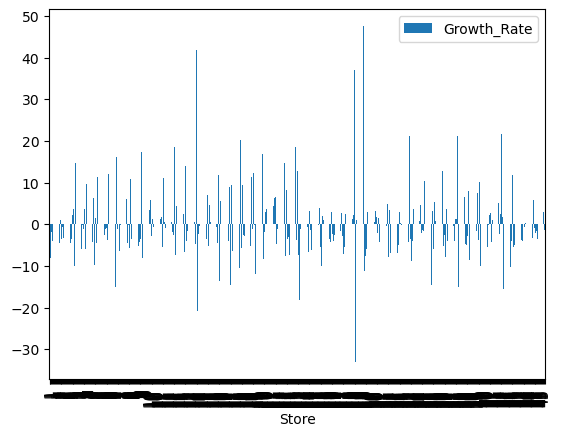

In [181]:
sort_db_q3
sort_db_q3.plot(x="Store", y="Growth_Rate", kind= "bar");

###### Question; Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together


In [126]:
#first we seperate data to holidays and non holidays
db.groupby('Holiday_Flag').mean()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Holiday_Flag,,,,,,
0,23.0,1.041256e+06,61.448124,3.368467,171.601725,7.993514
1,23.0,1.122888e+06,50.232044,3.227464,171.268092,8.074127


In [147]:
 Holidays =db.groupby('Holiday_Flag').get_group(1) 
Holidays_higher_sales = (Holidays["Weekly_Sales"] > 1.041256e+06)  #this is the mean value of the non holiday sales
Holidays_higher_sales
hhs = (Holidays[Holidays_higher_sales])
hhs.size
hhs
#This Dataframe shows all hoilidays higher than the mean weekly sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010Q4
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787,2010Q4
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,2010Q4
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,2010Q4
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,2011Q4
...,...,...,...,...,...,...,...,...,...
5819,41,2011-12-30,1264014.16,1,34.12,3.119,196.358610,6.759,2011Q4
5825,41,2012-10-02,1238844.56,1,22.00,3.103,196.919506,6.589,2012Q4
5855,41,2012-07-09,1392143.82,1,67.41,3.596,198.095048,6.432,2012Q3
6334,45,2010-11-26,1182500.16,1,46.15,3.039,182.783277,8.724,2010Q4


In [175]:
# Provide a monthly and semester view of sales in units and give insights
#bar chart on a datetime series 
db['Year'] = pd.to_datetime(db['Date']).dt.year
db['Month'] = pd.to_datetime(db['Date']).dt.month_name()
db['Month_num'] = pd.to_datetime(db['Date']).dt.month
db['Quarter_num'] = pd.to_datetime(db['Date']).dt.quarter
db

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Year,Month,Month_num,Quarter_num
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010Q2,2010,May,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010Q4,2010,December,12,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010Q1,2010,February,2,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010Q1,2010,February,2,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010Q2,2010,May,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012Q3,2012,September,9,3
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012Q2,2012,May,5,2
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012Q4,2012,December,12,4
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012Q4,2012,October,10,4


In [172]:
db_group_month = (db.groupby(["Month"]).mean())
monthly_view = db_group_month.sort_values("Month_num") 
monthly_view

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month_num
Month,,,,,,,,,
January,23.0,9.476139e+05,0.000000,49.474156,3.330407,171.562514,7.954104,2011.300000,1.0
February,23.0,1.054597e+06,0.000000,50.208061,3.208756,171.004785,8.106729,2010.909091,2.0
March,23.0,1.024975e+06,0.000000,57.414333,3.409254,171.717796,8.012141,2011.083333,3.0
April,23.0,1.024324e+06,0.000000,56.874238,3.493933,171.345886,8.036143,2011.000000,4.0
May,23.0,1.035379e+06,0.000000,62.361692,3.394745,170.845821,8.119055,2010.769231,5.0
June,23.0,1.064848e+06,0.000000,71.083870,3.441204,172.505648,7.858183,2011.250000,6.0
July,23.0,1.014212e+06,0.076923,74.005812,3.336779,171.611475,7.932359,2011.000000,7.0
August,23.0,1.044874e+06,0.000000,74.677296,3.389887,171.872540,7.944596,2011.000000,8.0
September,23.0,1.009457e+06,0.076923,66.021179,3.416744,172.220560,7.938304,2011.000000,9.0


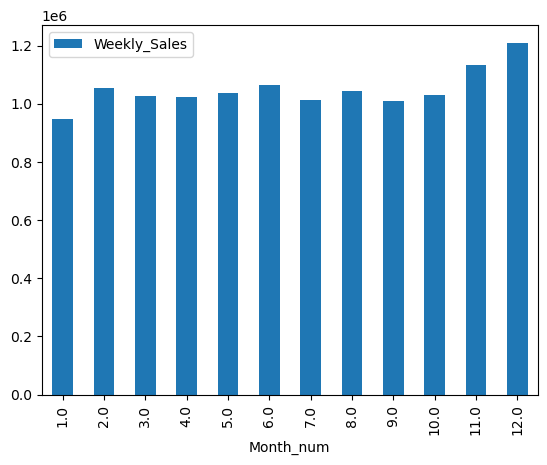

In [171]:
monthly_view.plot.bar(x="Month_num", y="Weekly_Sales");

In [176]:
db_group_quarter = (db.groupby(["Quarter"]).mean())

In [177]:
db_group_quarter

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month_num,Quarter_num
Quarter,,,,,,,,,,
2010Q1,23.0,1.037168e+06,0.000000,54.838494,2.776022,168.044806,8.531410,2010.0,2.333333,1.0
2010Q2,23.0,1.037367e+06,0.000000,61.976872,2.833251,167.870550,8.509376,2010.0,4.923077,2.0
2010Q3,23.0,1.015756e+06,0.000000,73.490056,2.787422,168.079642,8.443993,2010.0,8.000000,3.0
2010Q4,23.0,1.132484e+06,0.285714,50.834825,2.876806,168.372100,8.494129,2010.0,11.071429,4.0
2011Q1,23.0,9.927693e+05,0.000000,51.832370,3.423087,170.505685,8.194822,2011.0,1.833333,1.0
2011Q2,23.0,1.028999e+06,0.000000,60.798017,3.747515,171.205593,8.141178,2011.0,4.769231,2.0
2011Q3,23.0,1.021547e+06,0.071429,68.622952,3.594146,171.816072,8.073190,2011.0,8.000000,3.0
2011Q4,23.0,1.139428e+06,0.230769,52.649197,3.469754,172.554715,7.928309,2011.0,11.000000,4.0
2012Q1,23.0,1.010722e+06,0.000000,51.705611,3.620848,174.901655,7.478350,2012.0,2.083333,1.0


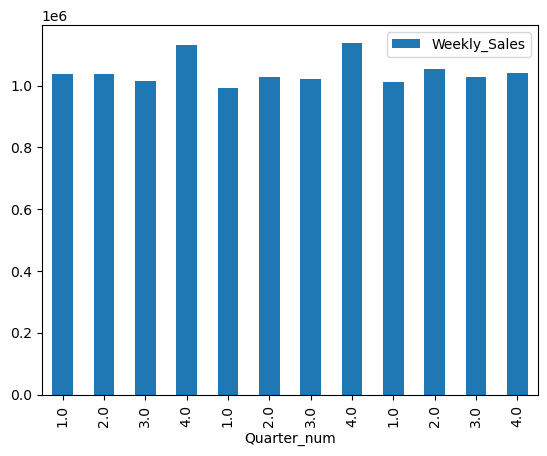

In [179]:
db_group_quarter.plot.bar(x="Quarter_num", y="Weekly_Sales");

 ## Insight;
 The first bar chart shows the monthly average performance through the years and its note worthy to see that the highest selling month is the 12th month that is December, followed by November, which are hoilday months, though September didn't show much increase being an holiday month.
 1-12 reads January to December respectively.
 
 The secomd bar chart shows us the average weekly sales in quarters of years 2010,2011 and 2012 repectively.
 We can see that the last quarter of 2010 and 2011 were the highest in the years except for the year 2012 where the last quarter seems to be on average,this has to be investigateed and looked into by Walmart Superstore. Other months like September and October in the last quarter of 2012 could have been low hence the reason for the average  weekly sales in this year.
 
 
 

 
 

## Conclusion;
There are other factors that should be looked into as affecting sales eg Government policies, Pandemic, Economy stability, Quality of Products sold and their prices, Customer care service etc, accessibiity to the store etc.
Holidays has a positive effect on sales as we saw for the few days of holidays in the years the average weekly sales was higher than that of the rest of the year. Although some holidays fell below average, majority showed to be above average. Which brigs us to that type of Holiday can be a huge factor in Sales.

For non-holidays there should be incentives to make customers buy goods like discounts, promos, coupons etc to promote sales i these period, it seems like most Holidays carry these incentives which boosts sales.